# https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

1.date: Date in format dd/mm/yyyy 

2.time: time in format hh:mm:ss 

3.global_active_power: household global minute-averaged active power (in kilowatt) 

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 

5.voltage: minute-averaged voltage (in volt) 

6.global_intensity: household global minute-averaged current intensity (in ampere) 

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import time

In [4]:
df1 = pd.read_csv('household_power_consumption_set_1.csv', 
                   sep=',',header=0,low_memory=False)
df2 = pd.read_csv('household_power_consumption_set_2.csv', 
                   sep=',',header=0,low_memory=False)
df3 = pd.read_csv('household_power_consumption_set_3.csv', 
                   sep=',',header=0,low_memory=False)
df = df1.append(df2.append(df3)) # Append the datasets


### Check to see if there are any missing data points

In [5]:
df = df.reset_index(drop=True)
df.dtypes

Datetime                  object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [29]:
df4['Date'] = df['Date'] # Extract the original date because the .apply operation makes Date and Time into NaN
df4['Time'] = df['Time'] # Extract the original time because the .apply operation makes Date and Time into NaN

In [30]:
# Create a new column
df4['Datetime'] = pd.to_datetime(df['Date']+' '+df['Time']) # took 5 minutes for me

In [31]:
df5=df4[['Datetime','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [32]:
df5 = df5.reset_index(drop=True)

In [37]:
df5.to_csv('df5.csv',index=False,columns=['Datetime','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [36]:
df5.tail()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26 20:58:00,0.946,0,240.43,4.0,0,0,0
2075255,2010-11-26 20:59:00,0.944,0,240.00,4.0,0,0,0
2075256,2010-11-26 21:00:00,0.938,0,239.82,3.8,0,0,0
2075257,2010-11-26 21:01:00,0.934,0,239.70,3.8,0,0,0
2075258,2010-11-26 21:02:00,0.932,0,239.55,3.8,0,0,0


In [17]:
df5[(df5.Datetime > datetime(2007,4,27)) & (df5.Datetime < datetime(2007,4,29)) ]

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
189037,2007-04-27 00:01:00,0.106,0.000,235.34,0.6,0,0,0
189038,2007-04-27 00:02:00,0.108,0.000,236.13,0.6,0,0,0
189039,2007-04-27 00:03:00,0.108,0.000,236.16,0.6,0,0,0
189040,2007-04-27 00:04:00,0.108,0.000,236.42,0.6,0,0,0
189041,2007-04-27 00:05:00,0.108,0.000,236.77,0.6,0,0,0
189042,2007-04-27 00:06:00,0.108,0.000,236.85,0.6,0,0,0
189043,2007-04-27 00:07:00,0.108,0.000,236.74,0.6,0,0,0
189044,2007-04-27 00:08:00,0.108,0.000,236.76,0.6,0,0,0
189045,2007-04-27 00:09:00,0.108,0.000,236.25,0.6,0,0,0
189046,2007-04-27 00:10:00,0.210,0.076,236.22,1.0,0,0,0


In [18]:
df5 = df5.reset_index(drop=True)

In [19]:
print 'First entry begins in MM/DD/YYYY = ', df5['Datetime'][0].month,'/',df5['Datetime'][0].day,'/',df5['Datetime'][0].year
print 'The time the entry begins is at = ', df5['Datetime'][0].time()
print 'The day of the week is = ', df5['Datetime'][0].weekday()
#Return the day of the week as an integer, where Monday is 0 and Sunday is 6.

First entry begins in MM/DD/YYYY =  12 / 16 / 2006
The time the entry begins is at =  17:24:00
The day of the week is =  5


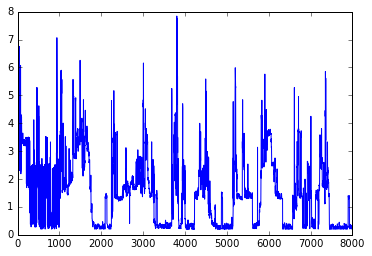

In [20]:
df5['Global_active_power'].head(8000).plot()

In [21]:
df6 = df5[ (df5['Datetime'] > datetime(2006,12,25,0,0,0) ) 
        &  (df5['Datetime'] < datetime(2006,12,26,0,0,0) ) ]

In [27]:
df7=df6
pd.Series(df6['Global_active_power']*1000/60.-df6['Sub_metering_1']-df6['Sub_metering_2']-df6['Sub_metering_3'],index=df6.index)
newcol = np.array(pd.Series(df6['Global_active_power']*1000/60.-df6['Sub_metering_1']-df6['Sub_metering_2']-df6['Sub_metering_3'],index=df6.index).tolist())
df7=df7.assign(remaining_active_power=newcol)

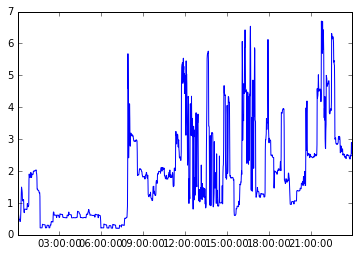

In [31]:
plt.plot(df7.Datetime.tolist(),df7['Global_active_power'])

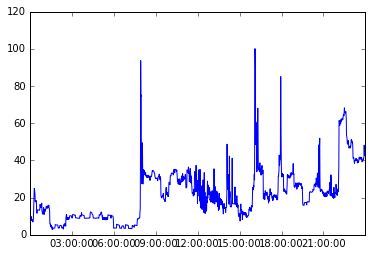

In [32]:
#df7.columns
plt.plot(df7.Datetime.tolist(),df7['remaining_active_power'])

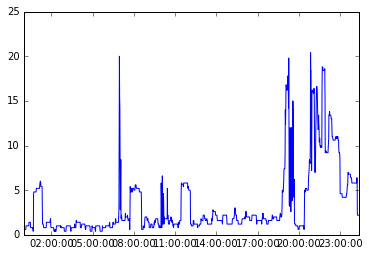

In [72]:
#check here April 28, 2007
df8 = df5[(df5['Datetime'] > datetime(2007,4,27)) & 
    (df5['Datetime'] < datetime(2007,4,29))]
#df8['Global_active_power']
plt.plot(df8.Datetime.tolist(), df8['Global_intensity'])
